# Laplacian: Function Instances Only

This notebook defines:
- All input functions as Function instances (Dirichlet/Neumann/Periodic families)
- All outputs (L[u]) as Function instances computed via the Laplacian

No plots, no metrics, no extras.

In [1]:
# Cell 1: Define ALL input functions as Function instances
from pygeoinf.interval import Lebesgue, IntervalDomain, BoundaryConditions, Laplacian, Function, InverseLaplacian
import numpy as np

# Domain and common parameters
a, b = 0.0, 1.0
L = b - a

# Spaces per BC family (use natural bases)
space_dirichlet = Lebesgue(256, IntervalDomain(a,b), basis='sine')
space_neumann   = Lebesgue(256, IntervalDomain(a,b), basis='cosine')
space_periodic  = Lebesgue(257, IntervalDomain(a,b), basis='fourier')

# Dirichlet inputs (D1–D5 examples)
D1 = Function(space_dirichlet, evaluate_callable=lambda x: (x - a) * (b - x), name='D1_bump')
D2 = Function(space_dirichlet, evaluate_callable=lambda x: np.sin(np.pi * (x - a) / L), name='D2_sin_pi')
D3 = Function(space_dirichlet, evaluate_callable=lambda x: np.sin(2*np.pi * (x - a) / L), name='D3_sin_2pi')
D4 = Function(space_dirichlet, evaluate_callable=lambda x: ((x-a)**2) * ((b-x)**2), name='D4_poly')
D5 = Function(space_dirichlet, evaluate_callable=lambda x: 5*np.sin(np.pi*(x-a)/L) - 7*np.sin(3*np.pi*(x-a)/L), name='D5_mix')

# Neumann inputs (N1–N5 examples)
N1 = Function(space_neumann, evaluate_callable=lambda x: np.zeros_like(x), name='N1_const')
N2 = Function(space_neumann, evaluate_callable=lambda x: np.cos(np.pi*(x-a)/L), name='N2_cos_pi')
N3 = Function(space_neumann, evaluate_callable=lambda x: np.cos(2*np.pi*(x-a)/L), name='N3_cos_2pi')
N4 = Function(space_neumann, evaluate_callable=lambda x: 3.0*np.cos(np.pi*(x-a)/L) - np.cos(3*np.pi*(x-a)/L), name='N4_mix')

# Periodic inputs (P1–P5 examples subset)
P1 = Function(space_periodic, evaluate_callable=lambda x: np.zeros_like(x), name='P1_const')
P2 = Function(space_periodic, evaluate_callable=lambda x: np.sin(2*np.pi*(x-a)/L), name='P2_sin_2pi')
P3 = Function(space_periodic, evaluate_callable=lambda x: np.cos(2*np.pi*(x-a)/L), name='P3_cos_2pi')
P4 = Function(space_periodic, evaluate_callable=lambda x: np.sin(4*np.pi*(x-a)/L) + 2*np.cos(6*np.pi*(x-a)/L), name='P4_combo')
# Family P5: define a small dictionary of modes n=0..4
P5 = {n: Function(space_periodic, evaluate_callable=(lambda x, n=n: np.sin(2*np.pi*n*(x-a)/L) if n>0 else np.zeros_like(x)), name=f'P5_sin_{n}') for n in range(0,5)}
P5_cos = {n: Function(space_periodic, evaluate_callable=(lambda x, n=n: np.cos(2*np.pi*n*(x-a)/L)), name=f'P5_cos_{n}') for n in range(1,5)}

# Group for clarity (no extra processing)
DIRICHLET_INPUTS = [D1, D2, D3, D4, D5]
NEUMANN_INPUTS   = [N1, N2, N3, N4]
PERIODIC_INPUTS  = [P1, P2, P3, P4] + list(P5.values()) + list(P5_cos.values())

In [2]:
# Cell 3: Mirror of Cell 1 — define analytic expected outputs as Function instances
from pygeoinf.interval import Function
import numpy as np

# Analytic Dirichlet outputs (D1..D5) as Function instances
D1_L = Function(space_dirichlet, evaluate_callable=lambda x: 2.0 * np.ones_like(x), name='D1_L')
D2_L = Function(space_dirichlet, evaluate_callable=lambda x: (np.pi / L)**2 * np.sin(np.pi * (x - a) / L), name='D2_L')
D3_L = Function(space_dirichlet, evaluate_callable=lambda x: (2 * np.pi / L)**2 * np.sin(2 * np.pi * (x - a) / L), name='D3_L')
D4_L = Function(space_dirichlet, evaluate_callable=lambda x: -2*(x-a)**2 + 8*(x-a)*(b-x) - 2*(b-x)**2, name='D4_L')
D5_L = Function(space_dirichlet, evaluate_callable=lambda x: 5*(np.pi / L)**2 * np.sin(np.pi * (x - a) / L) - 7*(3 * np.pi / L)**2 * np.sin(3 * np.pi * (x - a) / L), name='D5_L')

# Group similar to inputs for easy use
DIRICHLET_EXPECTED_FUNCTIONS = [D1_L, D2_L, D3_L, D4_L, D5_L]
DIRICHLET_EXPECTED = {f.name: f for f in DIRICHLET_EXPECTED_FUNCTIONS}

# Neumann analytic outputs (N1..N5)
N1_L = Function(space_neumann, evaluate_callable=lambda x: np.zeros_like(x), name='N1_L')  # constant -> Laplacian 0
N2_L = Function(space_neumann, evaluate_callable=lambda x: (np.pi / L)**2 * np.cos(np.pi * (x - a) / L), name='N2_L')
N3_L = Function(space_neumann, evaluate_callable=lambda x: (2 * np.pi / L)**2 * np.cos(2 * np.pi * (x - a) / L), name='N3_L')
N4_L = Function(space_neumann, evaluate_callable=lambda x: 3*(np.pi / L)**2 * np.cos(np.pi * (x - a) / L) - (3 * np.pi / L)**2 * np.cos(3 * np.pi * (x - a) / L), name='N4_L')

NEUMANN_EXPECTED_FUNCTIONS = [N1_L, N2_L, N3_L, N4_L]
NEUMANN_EXPECTED = {f.name: f for f in NEUMANN_EXPECTED_FUNCTIONS}

# Periodic analytic outputs (P1..P4 and P5 family)
P1_L = Function(space_periodic, evaluate_callable=lambda x: np.zeros_like(x), name='P1_L')
P2_L = Function(space_periodic, evaluate_callable=lambda x: (2 * np.pi / L)**2 * np.sin(2 * np.pi * (x - a) / L), name='P2_L')
P3_L = Function(space_periodic, evaluate_callable=lambda x: (2 * np.pi / L)**2 * np.cos(2 * np.pi * (x - a) / L), name='P3_L')
P4_L = Function(space_periodic, evaluate_callable=lambda x: (4 * np.pi / L)**2 * np.sin(4 * np.pi * (x - a) / L) + 2 * (6 * np.pi / L)**2 * np.cos(6 * np.pi * (x - a) / L), name='P4_L')
# P5 family: sin and cos modes n=0..4 (0 mode -> zeros)
P5_sin = {n: Function(space_periodic, evaluate_callable=(lambda x, n=n: (2 * np.pi * n / L)**2 * np.sin(2 * np.pi * n * (x - a) / L) if n>0 else np.zeros_like(x)), name=f'P5_sin_L_{n}') for n in range(0,5)}
P5_cos = {n: Function(space_periodic, evaluate_callable=(lambda x, n=n: (2 * np.pi * n / L)**2 * np.cos(2 * np.pi * n * (x - a) / L) if n>0 else np.zeros_like(x)), name=f'P5_cos_L_{n}') for n in range(1,5)}

PERIODIC_EXPECTED_FUNCTIONS = [P1_L, P2_L, P3_L, P4_L] + list(P5_sin.values()) + list(P5_cos.values())
PERIODIC_EXPECTED = {f.name: f for f in PERIODIC_EXPECTED_FUNCTIONS}


In [3]:
# Cell 2: Define ALL outputs as Function instances (apply Laplacian)
from pygeoinf.interval import Laplacian, BoundaryConditions

# Operators (spectral) per BC
L_dirichlet = Laplacian(space_dirichlet, BoundaryConditions('dirichlet'), method='spectral', dofs=512)
L_neumann   = Laplacian(space_neumann,   BoundaryConditions('neumann'),   method='spectral', dofs=512)
L_periodic  = Laplacian(space_periodic,  BoundaryConditions('periodic'),  method='spectral', dofs=512)

L_inv_dirichlet = InverseLaplacian(space_dirichlet, BoundaryConditions('dirichlet'), method='spectral', dofs=512)
L_inv_neumann   = InverseLaplacian(space_neumann,   BoundaryConditions('neumann'),   method='spectral', dofs=512)
L_inv_periodic  = InverseLaplacian(space_periodic,  BoundaryConditions('periodic'),  method='spectral', dofs=512)

# Apply and store outputs; outputs remain Function instances in same spaces
DIRICHLET_OUTPUTS = [L_dirichlet(u) for u in DIRICHLET_INPUTS]
NEUMANN_OUTPUTS   = [L_neumann(u)   for u in NEUMANN_INPUTS]
PERIODIC_OUTPUTS  = [L_periodic(u)  for u in PERIODIC_INPUTS]

INVERSE_DIRICHLET_OUTPUTS = [L_inv_dirichlet(u) for u in DIRICHLET_EXPECTED_FUNCTIONS]
INVERSE_NEUMANN_OUTPUTS   = [L_inv_neumann(u)   for u in NEUMANN_EXPECTED_FUNCTIONS]
INVERSE_PERIODIC_OUTPUTS  = [L_inv_periodic(u)  for u in PERIODIC_EXPECTED_FUNCTIONS]

# Provide dictionaries for quick lookup by name
DIRICHLET = {u.name: u for u in DIRICHLET_INPUTS}
DIRICHLET_LU = {u.name: v for u, v in zip(DIRICHLET_INPUTS, DIRICHLET_OUTPUTS)}
DIRICHLET_ILU = {u.name: v for u, v in zip(DIRICHLET_EXPECTED_FUNCTIONS, INVERSE_DIRICHLET_OUTPUTS)}
NEUMANN = {u.name: u for u in NEUMANN_INPUTS}
NEUMANN_LU = {u.name: v for u, v in zip(NEUMANN_INPUTS, NEUMANN_OUTPUTS)}
NEUMANN_ILU = {u.name: v for u, v in zip(NEUMANN_EXPECTED_FUNCTIONS, INVERSE_NEUMANN_OUTPUTS)}
PERIODIC = {u.name: u for u in PERIODIC_INPUTS}
PERIODIC_LU = {u.name: v for u, v in zip(PERIODIC_INPUTS, PERIODIC_OUTPUTS)}
PERIODIC_ILU = {u.name: v for u, v in zip(PERIODIC_EXPECTED_FUNCTIONS, INVERSE_PERIODIC_OUTPUTS)}

# Nothing else (no evaluation or plotting); all are Function instances.

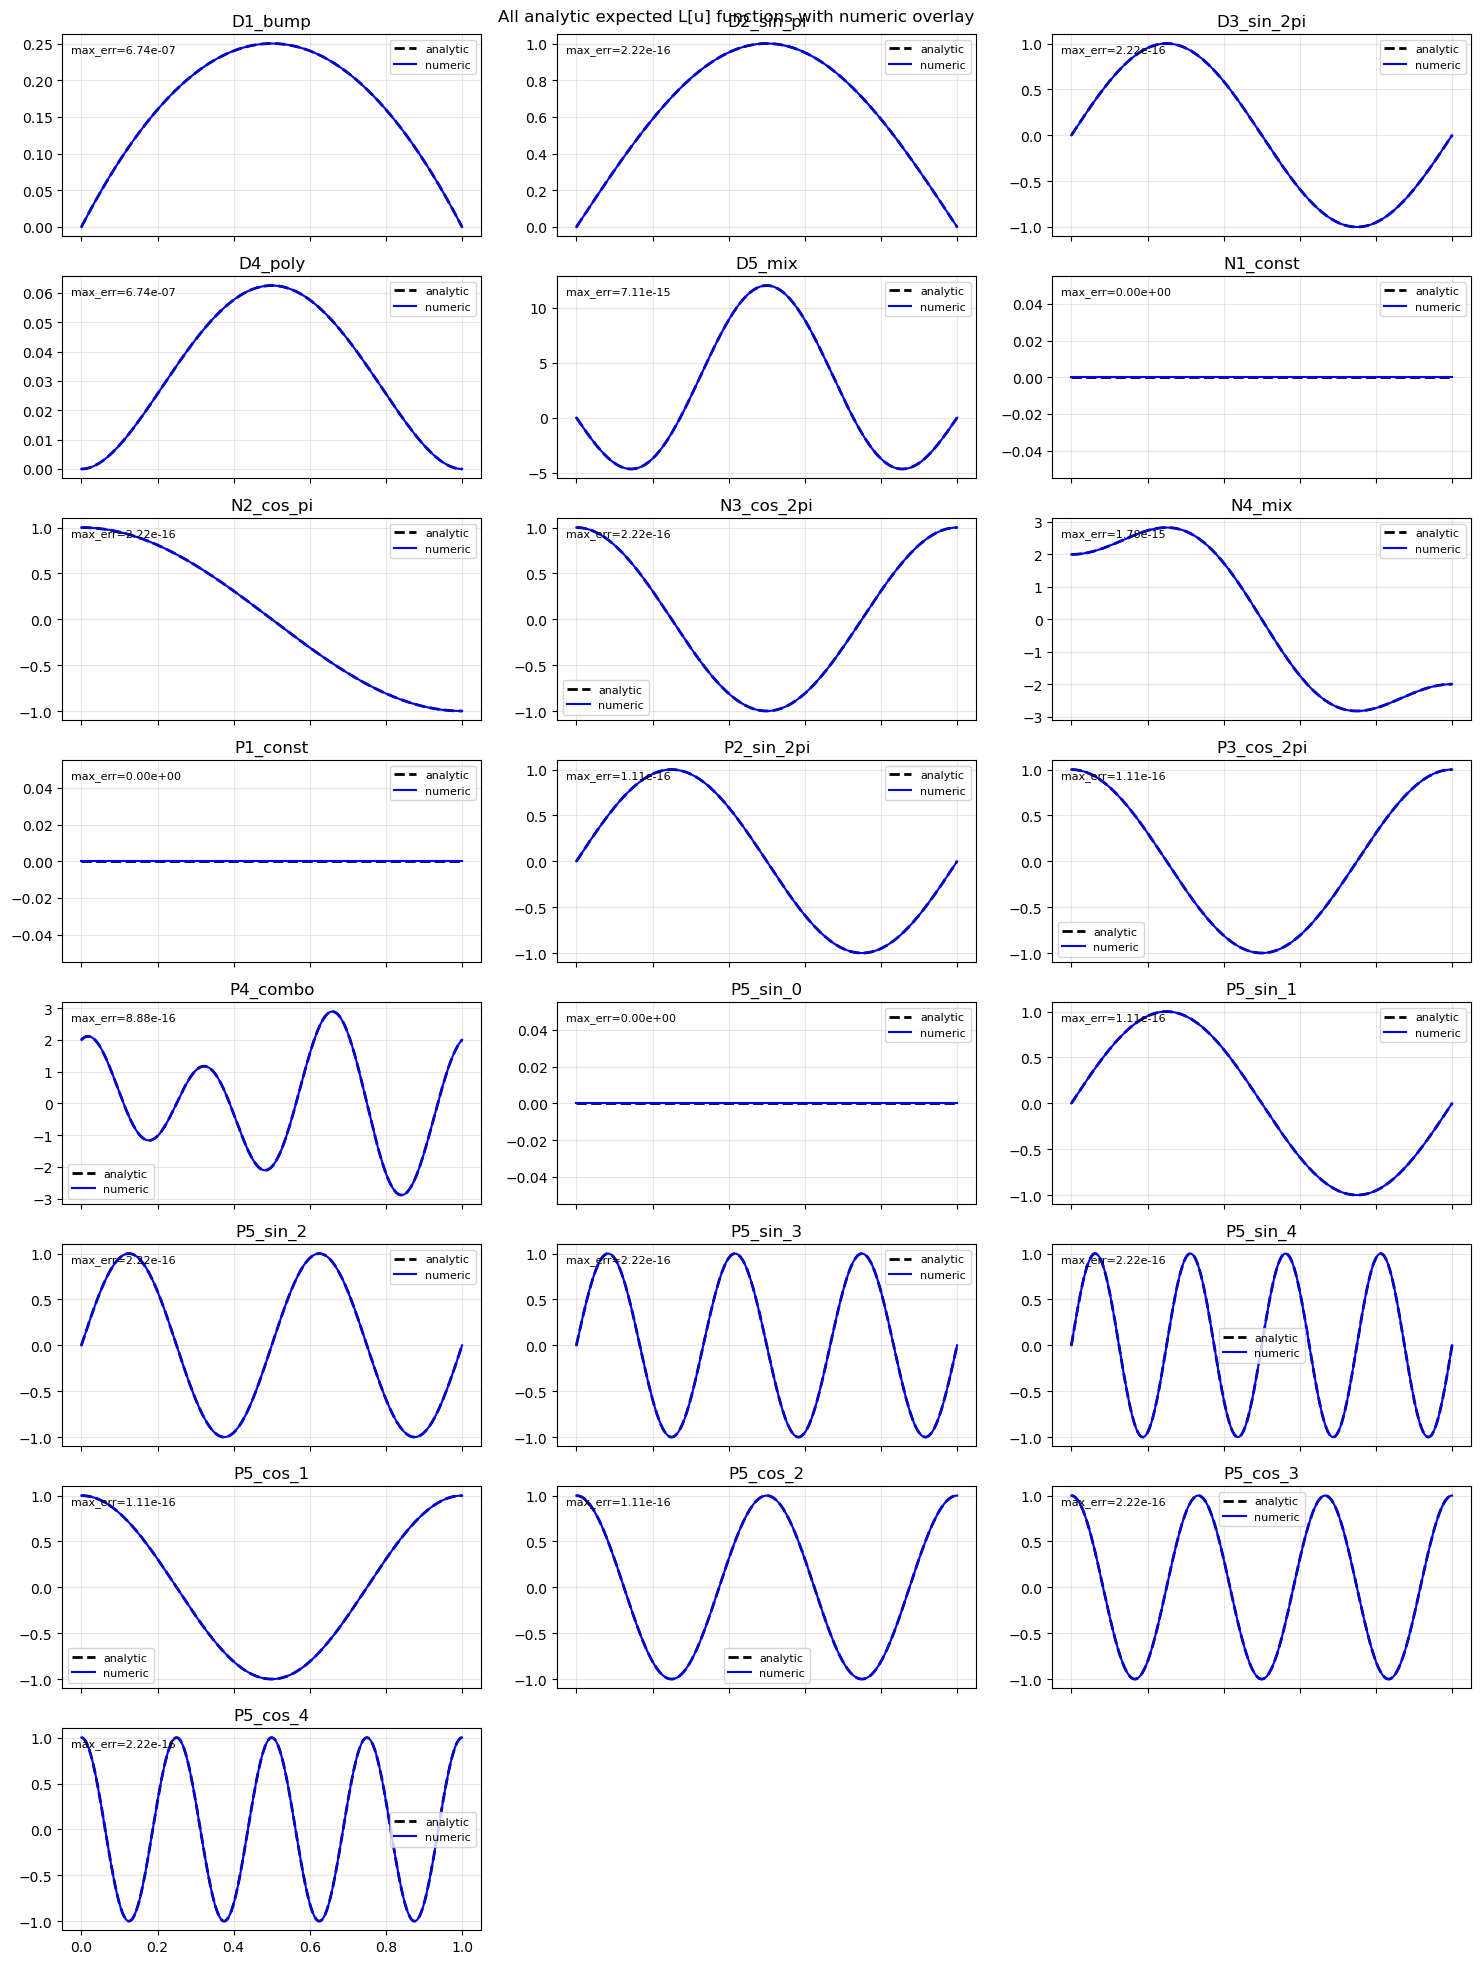

In [4]:
# Cell Z: Plot ALL analytic expected outputs (Dirichlet, Neumann, Periodic) and overlay numeric L[u]
import matplotlib.pyplot as plt
import numpy as np

# Evaluation grid
xs = np.linspace(a, b, 501)

# Collect analytic expected functions defined earlier
all_expected = list(DIRICHLET_INPUTS) + list(NEUMANN_INPUTS) + list(PERIODIC_INPUTS)
n = len(all_expected)

# Prepare corresponding numeric outputs in the same family order
numeric_dir = [DIRICHLET_ILU[u.name] for u in DIRICHLET_EXPECTED_FUNCTIONS]
numeric_neu = [NEUMANN_ILU[u.name] for u in NEUMANN_EXPECTED_FUNCTIONS]
numeric_per = [PERIODIC_ILU[u.name] for u in PERIODIC_EXPECTED_FUNCTIONS]
all_numeric = list(numeric_dir) + list(numeric_neu) + list(numeric_per)

# layout: 3 columns
ncols = 3
nrows = (n + ncols - 1) // ncols

fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 2.5 * nrows), sharex=True)
axs_flat = axs.flatten() if hasattr(axs, 'flatten') else np.array([axs]).flatten()

for i, f in enumerate(all_expected):
    # analytic
    try:
        y_analytic = f.evaluate(xs)
    except Exception:
        y_analytic = np.array([f(xi) for xi in xs])

    # numeric (if available)
    y_numeric = None
    if i < len(all_numeric):
        g = all_numeric[i]
        try:
            y_numeric = g.evaluate(xs)
        except Exception:
            y_numeric = np.array([g(xi) for xi in xs])

    ax = axs_flat[i]
    ax.plot(xs, y_analytic, 'k--', lw=2, label='analytic')
    if y_numeric is not None:
        ax.plot(xs, y_numeric, 'b-', lw=1.5, label='numeric')
        # annotate max error
        diff = y_numeric - y_analytic
        max_err = np.max(np.abs(diff))
        ax.text(0.02, 0.95, f'max_err={max_err:.2e}', transform=ax.transAxes, va='top', fontsize=8)
    ax.set_title(getattr(f, 'name', f'expected_{i}'))
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)

# Turn off unused axes
for j in range(n, len(axs_flat)):
    axs_flat[j].axis('off')

fig.suptitle('All analytic expected L[u] functions with numeric overlay')
plt.tight_layout()
plt.show()

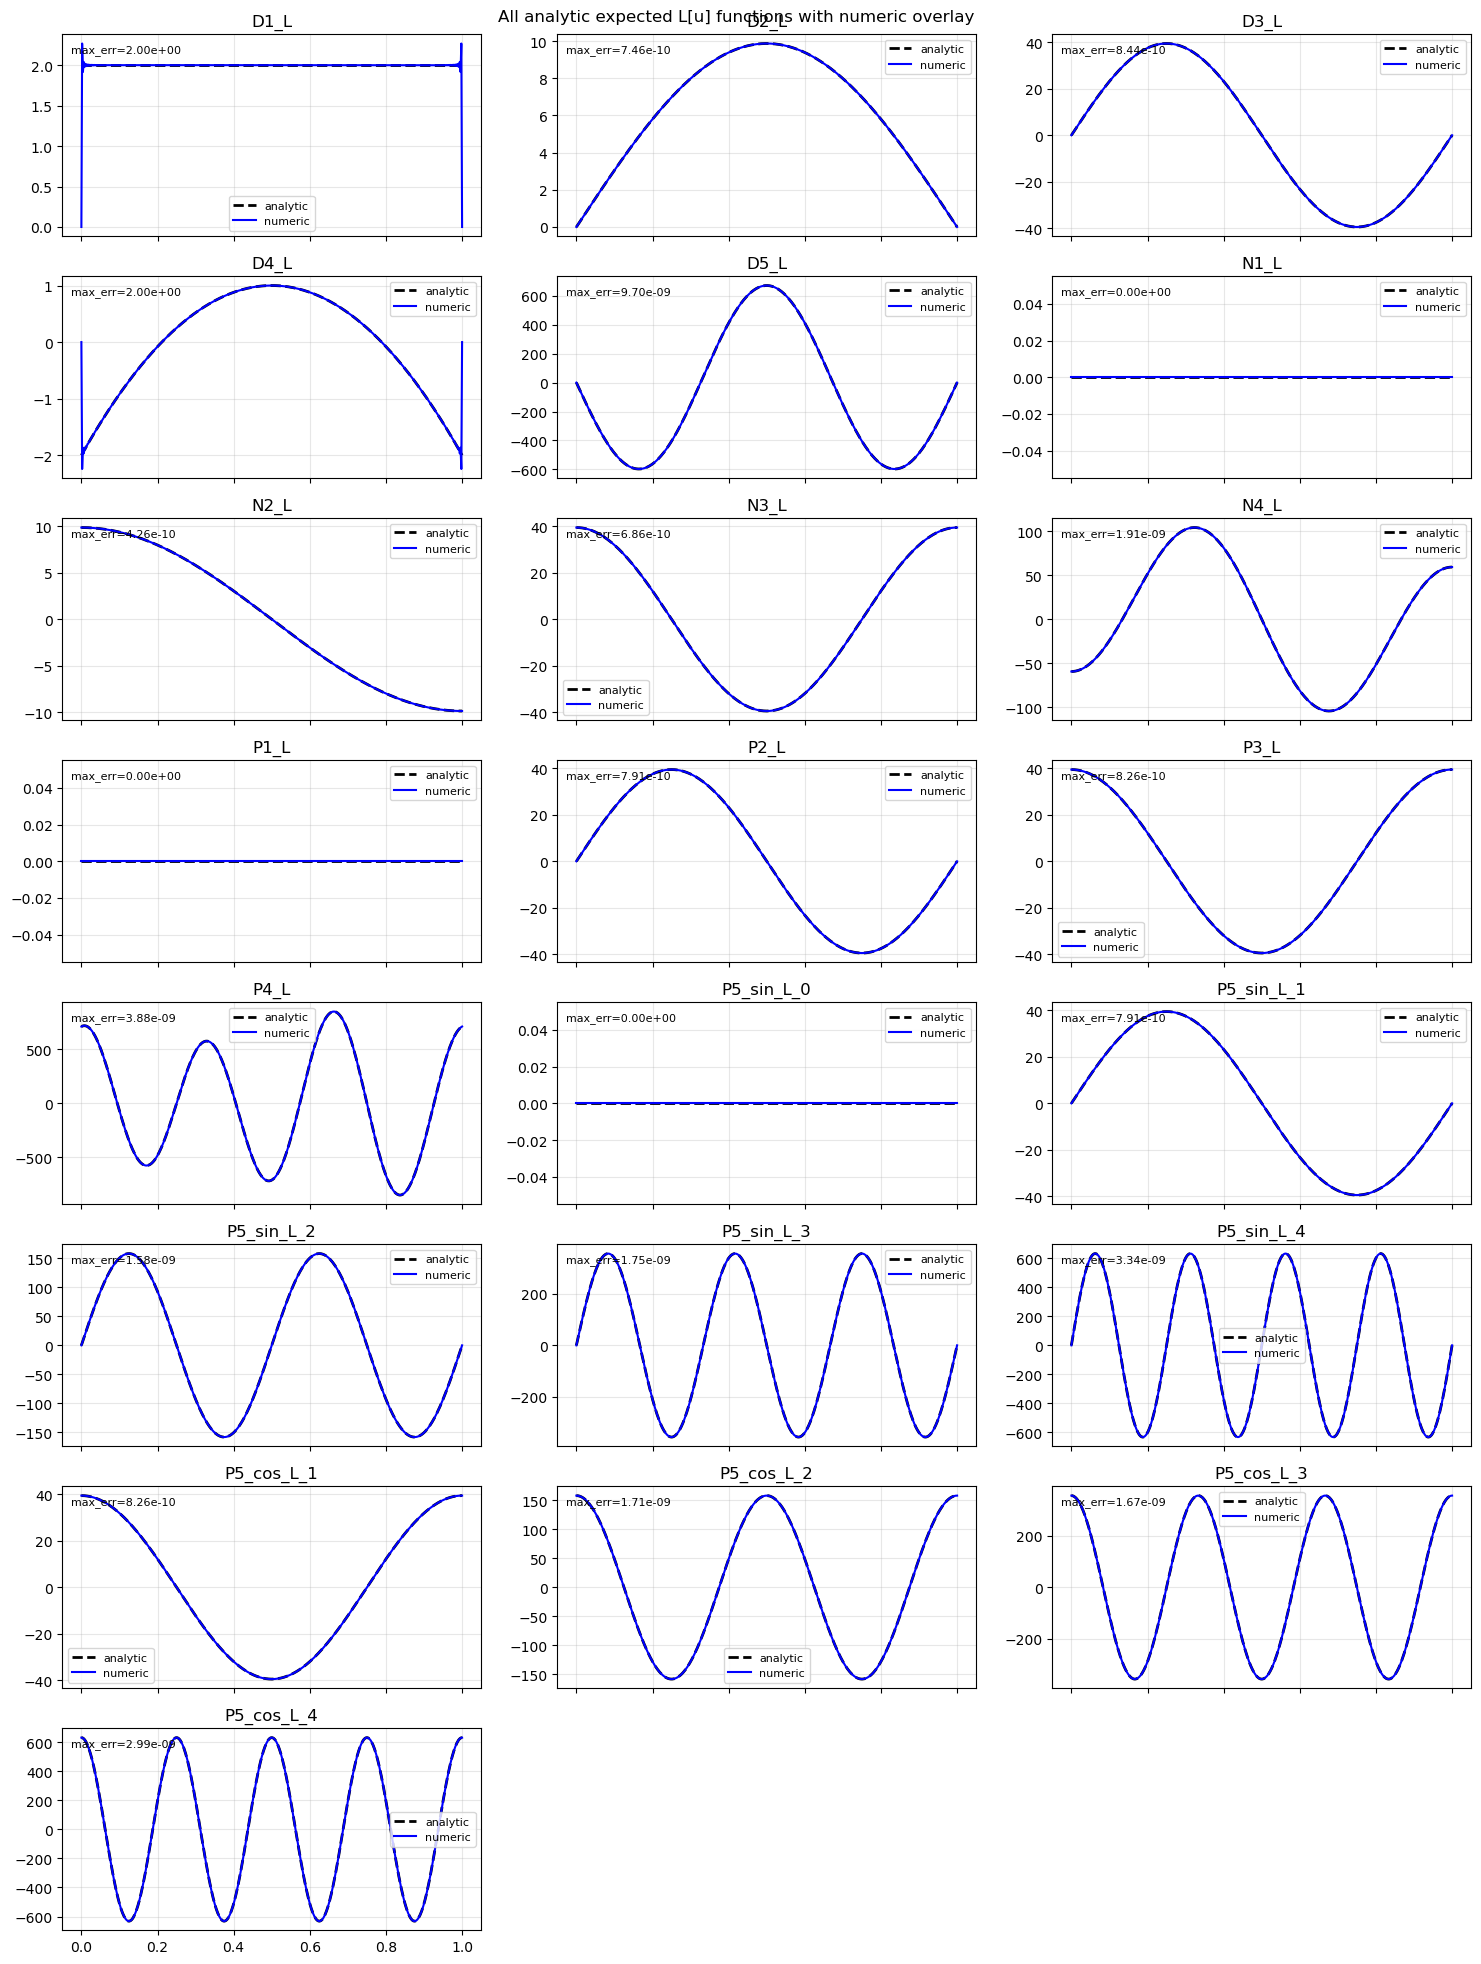

In [5]:
# Cell Z: Plot ALL analytic expected outputs (Dirichlet, Neumann, Periodic) and overlay numeric L[u]
import matplotlib.pyplot as plt
import numpy as np

# Evaluation grid
xs = np.linspace(a, b, 501)

# Collect analytic expected functions defined earlier
all_expected = list(DIRICHLET_EXPECTED_FUNCTIONS) + list(NEUMANN_EXPECTED_FUNCTIONS) + list(PERIODIC_EXPECTED_FUNCTIONS)
n = len(all_expected)

# Prepare corresponding numeric outputs in the same family order
numeric_dir = [DIRICHLET_LU[u.name] for u in DIRICHLET_INPUTS]
numeric_neu = [NEUMANN_LU[u.name] for u in NEUMANN_INPUTS]
numeric_per = [PERIODIC_LU[u.name] for u in PERIODIC_INPUTS]
all_numeric = list(numeric_dir) + list(numeric_neu) + list(numeric_per)

# layout: 3 columns
ncols = 3
nrows = (n + ncols - 1) // ncols

fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 2.5 * nrows), sharex=True)
axs_flat = axs.flatten() if hasattr(axs, 'flatten') else np.array([axs]).flatten()

for i, f in enumerate(all_expected):
    # analytic
    try:
        y_analytic = f.evaluate(xs)
    except Exception:
        y_analytic = np.array([f(xi) for xi in xs])

    # numeric (if available)
    y_numeric = None
    if i < len(all_numeric):
        g = all_numeric[i]
        try:
            y_numeric = g.evaluate(xs)
        except Exception:
            y_numeric = np.array([g(xi) for xi in xs])

    ax = axs_flat[i]
    ax.plot(xs, y_analytic, 'k--', lw=2, label='analytic')
    if y_numeric is not None:
        ax.plot(xs, y_numeric, 'b-', lw=1.5, label='numeric')
        # annotate max error
        diff = y_numeric - y_analytic
        max_err = np.max(np.abs(diff))
        ax.text(0.02, 0.95, f'max_err={max_err:.2e}', transform=ax.transAxes, va='top', fontsize=8)
    ax.set_title(getattr(f, 'name', f'expected_{i}'))
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)

# Turn off unused axes
for j in range(n, len(axs_flat)):
    axs_flat[j].axis('off')

fig.suptitle('All analytic expected L[u] functions with numeric overlay')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Function on [0.0, 1.0]'}, xlabel='x', ylabel='f(x)'>

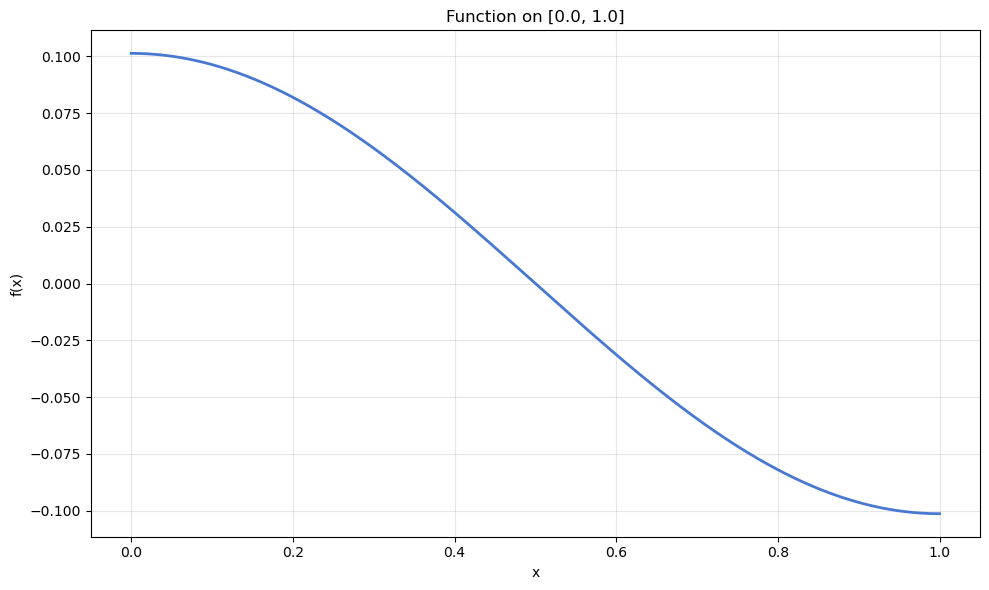

In [6]:
L_inv_neumann(N2).plot()